In [1]:
import numpy as np
from IPython.core.display import display, HTML
from IPython.display import display
import ipywidgets as widgets
from string import Template
import json
from scipy import stats
from IPython.display import clear_output
import ipyparallel as ipp
from matplotlib import pyplot as plt
rc = ipp.Client('/home/rnithin/.ipython/profile_default/security/ipcontroller-client.json')
dv = rc[:]
rc.ids

/usr/local/lib/python3.6/dist-packages/ipyparallel/util.py:208: RuntimeWarning: IPython could not determine IPs for Frostbelts: [Errno -2] Name or service not known
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@Frostbelts')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


[0, 1, 2, 3, 4, 5, 6, 7]

/usr/lib/python3/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


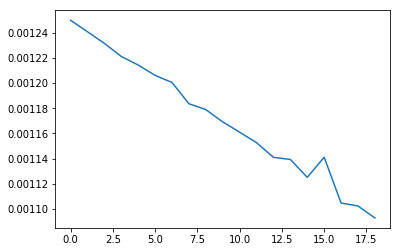

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for z in range(0, 20):
    ax.clear()
    x = np.arange(z)
    y = 0.00025 + 0.001 * np.exp(-x/100.) + stats.gamma(3).rvs(len(x))*(1-np.exp(-x/100))*2e-5
    ax.plot(y)
    fig.canvas.draw()


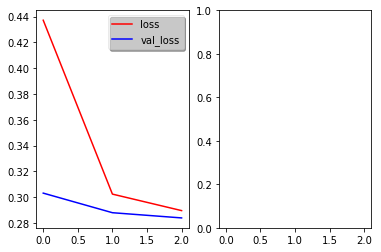

In [ ]:
# %%px --targets :3
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
from keras.callbacks import CSVLogger

accu, val_accu = [], []

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

(X_train, y_train), (X_test, y_test) = mnist.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.
class PlotLearning(keras.callbacks.Callback):
        def on_train_begin(self, logs={}):
                self.i = 0
                self.x = []
                self.losses = []
                self.val_losses = []
                self.acc = []
                self.val_acc = []
                self.fig = plt.figure()
                self.logs = []
                
        def on_epoch_end(self, epoch, logs={}):
                self.logs.append(logs)
                self.x.append(self.i)
                self.losses.append(logs.get('loss'))
                self.val_losses.append(logs.get('val_loss'))
                self.acc.append(logs.get('acc'))
                self.val_acc.append(logs.get('val_acc'))
                self.i += 1
                f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
                clear_output(wait=True)

                loss, = ax1.plot(self.x, self.losses, label="loss", color='red')
                val_loss, = ax1.plot(self.x, self.val_losses, label="val_loss", color='blue')
                #ax1.legend()
                leg = ax1.legend(loc='upper right', fancybox=True, shadow=True)
                leg.get_frame().set_alpha(0.4)
                lines = [loss, val_loss]
                lined = dict()
                for legline, origline in zip(leg.get_lines(), lines):
                        legline.set_picker(5)  # 5 pts tolerance
                        lined[legline] = origline

                def onpick(event):
                        legline = event.artist
                        origline = lined[legline]
                        vis = not origline.get_visible()
                        origline.set_visible(vis)
                        if vis:
                                legline.set_alpha(1.0)
                        else:
                                legline.set_alpha(0.2)
                        f.canvas.draw()
                        
                # f.canvas.mpl_connect('pick_event', onpick)
                plt.show();
                
plot = PlotLearning()

csv_logger = CSVLogger('log.csv', append=True, separator=';')

model1 = Sequential()

model1.add(Flatten(input_shape=(28, 28, 1)))
model1.add(Dense(10))
model1.add(Activation('softmax'))

model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28, 1)))
model2.add(Dense(10))
model2.add(Activation('relu'))

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, Y_train,
              epochs=4,
              validation_data=(X_test, Y_test),
              callbacks=[plot, csv_logger],
              verbose=0)


In [ ]:
%%px --targets 3:

import pandas as pd

df = pd.read_csv('log.csv')
df

In [ ]:
%%px --targets 1

model2.fit(X_train, Y_train,
          epochs=3,
          validation_data=(X_test, Y_test),
          callbacks=[plot, csv_logger],
          verbose=0)

In [ ]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 0.2, 0.1)
y1 = 2*np.sin(2*np.pi*t)
y2 = 4*np.sin(2*np.pi*2*t)

fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
line1, = ax.plot(t, y1, lw=2, color='red', label='1 HZ')
line2, = ax.plot(t, y2, lw=2, color='blue', label='2 HZ')
leg = ax.legend(loc='upper left', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)

# we will set up a dict mapping legend line to orig line, and enable
# picking on the legend line
lines = [line1, line2]
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

In [ ]:
from IPython.html import widgets
from IPython.utils.traitlets import Unicode


class CircleView(widgets.DOMWidget):
    _view_name = Unicode('CircleView', sync=True)

    def __init__(self, *pargs, **kwargs):
        widgets.DOMWidget.__init__(self, *pargs, **kwargs)
        self._handlers = widgets.CallbackDispatcher()
        self.on_msg(self._handle_my_msg)

    def _ipython_display_(self, *pargs, **kwargs):
        widgets.DOMWidget._ipython_display_(self, *pargs, **kwargs)

    def _handle_my_msg(self, _, content):
        """handle a message from the frontent"""
        if content.get('event', '') == 'mouseover':
            self._handlers(self)

    def on_mouseover(self, callback):
        """Register a callback at mouseover"""
        self._handlers.register_callback(callback)

In [ ]:
%%javascript

require(["//cdnjs.cloudflare.com/ajax/libs/d3/3.4.1/d3.min.js",
         "widgets/js/widget"], function(d3, WidgetManager){

  var CircleView = IPython.DOMWidgetView.extend({

    render: function(){
            this.guid = 'circle' + IPython.utils.uuid();
            this.setElement($('<div />', {id: this.guid}));
            
            this.model.on('msg:custom', this.on_msg, this);
            this.has_drawn = false;

            // Wait for element to be added to the DOM
            var that = this;
            setTimeout(function() {
                that.update();
            }, 0);
    },

    update: function(){
        var that = this;

        if (!this.has_drawn) {
           this.has_drawn = true;

           this.svg = d3.select("#" + this.guid).append("svg")
               .attr("width", 200)
               .attr("height", 200);

           this.circle = this.svg.append("circle")
                    .attr("cx", 100)
                    .attr("cy", 100)
                    .attr("r", 20)
                    .style("fill", "red")
                    .style("fill-opacity", 0.5)
                    .on("mouseenter", function(){that.send({event:'mouseover'})});
       }
       return CircleView.__super__.update.apply(this);
    },

    on_msg: function(attrs){
        this.circle.transition().attr(attrs).style(attrs);
    }
  });
  WidgetManager.register_widget_view('CircleView', CircleView);
})

In [ ]:
from random import randint

colors = ['blue', 'green', 'orange', 'black', 'magenta', 'red']

def update_circle(view):
    view.send({"cx": randint(30, 170),
               "cy": randint(30, 170),
               "r": randint(10, 30),
               "fill": colors[randint(0, 5)]})

circle = CircleView()
circle.on_mouseover(update_circle)

print("Try to catch the circle!")
display(circle)

In [ ]:
plot_losses

In [ ]:
y

In [ ]:
%matplotlib notebook

"""
Enable picking on the legend to toggle the original line on and off
"""
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 0.2, 0.1)
y1 = 2*np.sin(2*np.pi*t)
y2 = 4*np.sin(2*np.pi*2*t)

fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
line1, = ax.plot(t, y1, lw=2, color='red', label='1 HZ')
line2, = ax.plot(t, y2, lw=2, color='blue', label='2 HZ')
leg = ax.legend(loc='upper left', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)


# we will set up a dict mapping legend line to orig line, and enable
# picking on the legend line
lines = [line1, line2]
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

In [ ]:
matplotlib